In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import random

In [2]:
n = 10  # 100 nodes
m = 20  # 500 edges
seed = 100  # seed random number generators for reproducibility

# Use seed for reproducibility
G = nx.gnm_random_graph(n, m, seed=seed)

In [3]:
edge_weights = np.array([[e, np.random.rand()] for e in G.edges()]) # shape (nb_edges, 2)
for e, weight in edge_weights:
    G[e[0]][e[1]]['weight'] = np.random.randint(10) # Adds weights to all edges ((G[(0,1)][(0,2)]) = {'weight': 0.59})
nodes = [n for n in G.nodes()]

/tmp/ipykernel_6397/359506738.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  edge_weights = np.array([[e, np.random.rand()] for e in G.edges()]) # shape (nb_edges, 2)


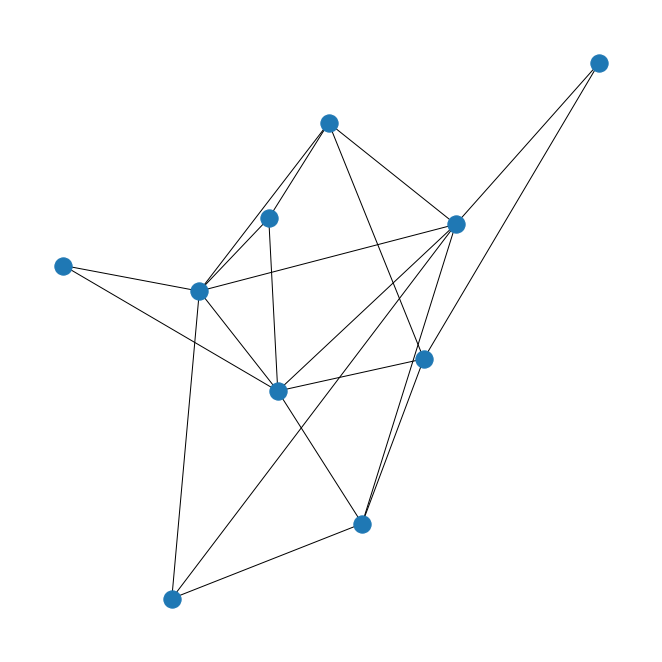

In [4]:
plt.figure(figsize=(9,9))
pos = nx.spring_layout(G, k=0.15, iterations=20)

nx.draw(G, pos=pos)
plt.show()

In [5]:
A = nx.convert_matrix.to_numpy_array(G)
print(A)

[[0. 0. 0. 7. 0. 0. 0. 0. 0. 5.]
 [0. 0. 5. 0. 0. 0. 0. 0. 2. 0.]
 [0. 5. 0. 1. 0. 0. 1. 4. 0. 6.]
 [7. 0. 1. 0. 6. 7. 8. 8. 0. 0.]
 [0. 0. 0. 6. 0. 0. 8. 4. 0. 0.]
 [0. 0. 0. 7. 0. 0. 4. 0. 0. 0.]
 [0. 0. 1. 8. 8. 4. 0. 0. 8. 5.]
 [0. 0. 4. 8. 4. 0. 0. 0. 6. 0.]
 [0. 2. 0. 0. 0. 0. 8. 6. 0. 7.]
 [5. 0. 6. 0. 0. 0. 5. 0. 7. 0.]]


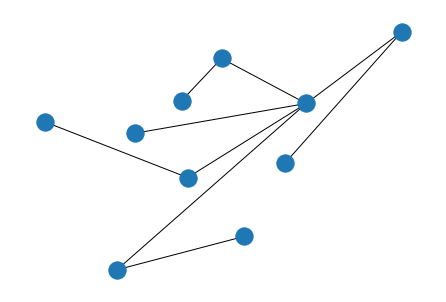

In [6]:
T=nx.minimum_spanning_tree(G)
nx.draw(T, pos=pos)
plt.show()

In [7]:
from timeit import default_timer as d_timer

In [41]:
time = np.zeros(250)
# Use seed for reproducibility
for i in range(250):
    tmp_5 = np.zeros(5)
    n = i + 10
    m = n*2
    for j in range(5):
        G = nx.gnm_random_graph(n, m, seed=seed)
        t0 = d_timer()
        T = nx.minimum_spanning_tree(G)
        tmp_5[j] = d_timer() - t0
    time[i] = np.mean(tmp_5)


In [34]:
def Const(vector):
    return 5.5

const_time = np.zeros(250)

for i in range(250):
    vector = np.random.rand(i+1)
    t0 = d_timer()
    result = Const(vector)
    const_time[i] = d_timer() - t0
t_const = np.min(const_time)



In [13]:
from matplotlib import pyplot as plt

In [38]:
theor_nlogn = np.zeros(250)
def n_logn(x):
    return t_const * (x * np.log2(x))
for i in range(250):
    theor_nlogn[i] = n_logn(2*(i+10))



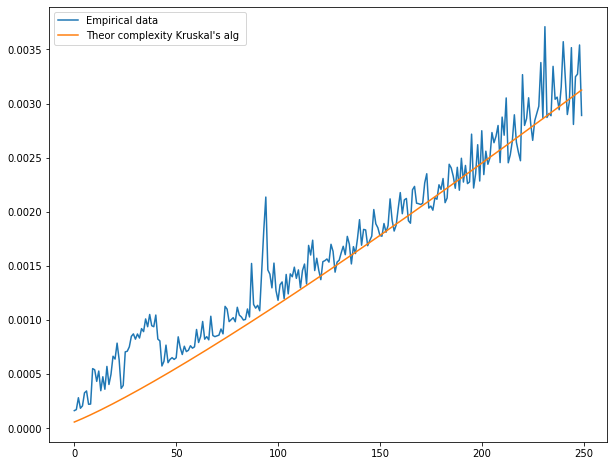

In [42]:
plt.figure(figsize=(10, 8))
plt.plot(time)
plt.plot(2.8 * theor_nlogn)
plt.legend(['Empirical data', "Theor complexity Kruskal's alg "])